In [1]:
# Impoting required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# setting default option
pd.set_option("mode.copy_on_write", True)

In [2]:
# importing datasets
df = pd.read_parquet("../../Data/processed/mortality.parquet")
df.sample(5)

,State,County,County_Code,Year,Cause,Deaths
10412,WI,DODGE,55027,2015,Drug poisonings (overdose) Unintentional (X40-...,17
10004,NY,WESTCHESTER,36119,2015,Drug poisonings (overdose) Unintentional (X40-...,101
3532,FL,OKALOOSA,12091,2008,Drug poisonings (overdose) Unintentional (X40-...,16
1879,AL,JEFFERSON,01073,2006,Drug poisonings (overdose) Unintentional (X40-...,55
2320,NY,NIAGARA,36063,2006,Drug poisonings (overdose) Undetermined (Y10-Y14),12


In [3]:
population = pd.read_parquet("../../Data/processed/population.parquet")
population.sample(5)

,State,State_Code,County,County_Code,Year,Population
32553,Texas,48,BASTROP,48021,2004,67122
4620,Florida,12,WAKULLA,12129,2008,29183
4531,Florida,12,SARASOTA,12115,2010,379942
36850,Virginia,51,HENRY,51089,2011,53530
18066,Mississippi,28,FORREST,28035,2012,76433


In [4]:
# Dropping Alaska
df = df[df["State"] != "AK"]

In [5]:
df["Cause"].value_counts()

Cause
Drug poisonings (overdose) Unintentional (X40-X44)    7538
Drug poisonings (overdose) Suicide (X60-X64)          1461
Drug poisonings (overdose) Undetermined (Y10-Y14)      757
All other drug-induced causes                          625
Drug poisonings (overdose) Homicide (X85)                2
Name: count, dtype: int64

In [6]:
# Dropping poisonong since we have only 2 values
df = df[df["Cause"] != "Drug poisonings (overdose) Homicide (X85)"]

In [7]:
df.isna().sum()

State          0
County         0
County_Code    0
Year           0
Cause          0
Deaths         8
dtype: int64

In [8]:
df[df["Deaths"].isna()]

,State,County,County_Code,Year,Cause,Deaths
10345,VA,BEDFORD CITY,51515,2015,Drug poisonings (overdose) Unintentional (X40-...,<NA>
10346,VA,BEDFORD CITY,51515,2015,Drug poisonings (overdose) Suicide (X60-X64),<NA>
10348,VA,BEDFORD CITY,51515,2015,Drug poisonings (overdose) Undetermined (Y10-Y14),<NA>
10349,VA,BEDFORD CITY,51515,2015,All other drug-induced causes,<NA>
10351,VA,CLIFTON FORGE CITY,51560,2015,Drug poisonings (overdose) Unintentional (X40-...,<NA>
10352,VA,CLIFTON FORGE CITY,51560,2015,Drug poisonings (overdose) Suicide (X60-X64),<NA>
10354,VA,CLIFTON FORGE CITY,51560,2015,Drug poisonings (overdose) Undetermined (Y10-Y14),<NA>
10355,VA,CLIFTON FORGE CITY,51560,2015,All other drug-induced causes,<NA>


In [9]:
# drop these NAs for now since they are all in VA and in 2015
df = df.dropna()

In [10]:
df["Deaths"].describe()

count      10373.0
mean      37.01475
std      53.134654
min           10.0
25%           13.0
50%           19.0
75%           36.0
max          705.0
Name: Deaths, dtype: Float64

In [11]:
population["Population"].describe()

count    4.049500e+04
mean     9.803144e+04
std      3.135551e+05
min      0.000000e+00
25%      1.126200e+04
50%      2.577600e+04
75%      6.644000e+04
max      1.007726e+07
Name: Population, dtype: float64

In [12]:
combined = pd.merge(
    df,
    population,
    on=["County_Code", "Year"],
    how="left",
    validate="m:1",
    indicator=True,
)
combined.sample(5)

,State_x,County_x,County_Code,Year,Cause,Deaths,State_y,State_Code,County_y,Population,_merge
8701,IN,BARTHOLOMEW,18005,2014,Drug poisonings (overdose) Unintentional (X40-...,10,Indiana,18,BARTHOLOMEW,80546,both
2780,FL,PINELLAS,12103,2007,Drug poisonings (overdose) Unintentional (X40-...,202,Florida,12,PINELLAS,918624,both
5055,DC,DISTRICT OF COLUMBIA,11001,2010,Drug poisonings (overdose) Unintentional (X40-...,61,District of Columbia,11,DISTRICT OF COLUMBIA,605282,both
3004,NE,DOUGLAS,31055,2007,Drug poisonings (overdose) Undetermined (Y10-Y14),11,Nebraska,31,DOUGLAS,498743,both
8226,PA,PHILADELPHIA,42101,2013,Drug poisonings (overdose) Unintentional (X40-...,378,Pennsylvania,42,PHILADELPHIA,1558713,both


In [13]:
# check if any of them don't have a match
combined[combined["_merge"] == "left_only"]

,State_x,County_x,County_Code,Year,Cause,Deaths,State_y,State_Code,County_y,Population,_merge


In [14]:
# check counties with no population data
combined["Population"].describe()

count    1.037300e+04
mean     5.888579e+05
std      9.580291e+05
min      1.028200e+04
25%      1.315990e+05
50%      2.834050e+05
75%      6.970800e+05
max      1.007726e+07
Name: Population, dtype: float64

In [15]:
combined["Deaths"].describe()

count      10373.0
mean      37.01475
std      53.134654
min           10.0
25%           13.0
50%           19.0
75%           36.0
max          705.0
Name: Deaths, dtype: Float64

In [16]:
combined.sample(5)

,State_x,County_x,County_Code,Year,Cause,Deaths,State_y,State_Code,County_y,Population,_merge
4274,DC,DISTRICT OF COLUMBIA,11001,2009,Drug poisonings (overdose) Undetermined (Y10-Y14),10,District of Columbia,11,DISTRICT OF COLUMBIA,592228,both
8367,VA,RICHMOND CITY,51760,2013,Drug poisonings (overdose) Unintentional (X40-...,27,Virginia,51,RICHMOND CITY,214020,both
1698,OR,MULTNOMAH,41051,2005,Drug poisonings (overdose) Suicide (X60-X64),21,Oregon,41,MULTNOMAH,674862,both
3473,CO,WELD,08123,2008,Drug poisonings (overdose) Unintentional (X40-...,15,Colorado,08,WELD,243442,both
9747,MD,FREDERICK,24021,2015,Drug poisonings (overdose) Unintentional (X40-...,11,Maryland,24,FREDERICK,245145,both


In [17]:
# clean combined as required
df2 = combined[
    [
        "State_y",
        "State_x",
        "County_x",
        "County_Code",
        "Year",
        "Cause",
        "Deaths",
        "Population",
    ]
]

In [18]:
df2 = df2.rename(
    columns={"State_y": "State", "State_x": "State_Code", "County_x": "County"}
)

In [19]:
df2.sample(5)

,State,State_Code,County,County_Code,Year,Cause,Deaths,Population
7184,New York,NY,RENSSELAER,36083,2012,Drug poisonings (overdose) Undetermined (Y10-Y14),10,159466
2453,Pennsylvania,PA,SCHUYLKILL,42107,2006,Drug poisonings (overdose) Unintentional (X40-...,21,148005
1649,North Carolina,NC,VANCE,37181,2005,Drug poisonings (overdose) Unintentional (X40-...,10,44136
4246,Colorado,CO,BOULDER,08013,2009,Drug poisonings (overdose) Suicide (X60-X64),16,293190
8285,Tennessee,TN,WILSON,47189,2013,Drug poisonings (overdose) Unintentional (X40-...,19,122033


In [20]:
# Claculating Mortality Rate
df3 = df2.copy()
df3["Mortality_Rate"] = df3["Deaths"] / df3["Population"]

In [21]:
df3.sample(5)

,State,State_Code,County,County_Code,Year,Cause,Deaths,Population,Mortality_Rate
8307,Texas,TX,HAYS,48209,2013,Drug poisonings (overdose) Unintentional (X40-...,10,175933,0.000057
934,New Mexico,NM,CHAVES,35005,2004,Drug poisonings (overdose) Unintentional (X40-...,12,61478,0.000195
7709,Florida,FL,ORANGE,12095,2013,Drug poisonings (overdose) Unintentional (X40-...,105,1227761,0.000086
7354,South Carolina,SC,ANDERSON,45007,2012,Drug poisonings (overdose) Unintentional (X40-...,28,188860,0.000148
6651,Wisconsin,WI,WAUKESHA,55133,2011,Drug poisonings (overdose) Unintentional (X40-...,42,390895,0.000107


In [22]:
# Calculating Mortality Rate for each casue at state level
df4 = (
    df3.groupby(["State", "State_Code", "Year", "Cause"])
    .agg({"Deaths": "sum", "Population": "sum"})
    .reset_index()
)

In [23]:
df4.sample(5)

,State,State_Code,Year,Cause,Deaths,Population
1181,Oregon,OR,2007,Drug poisonings (overdose) Suicide (X60-X64),13,697799
454,Illinois,IL,2013,Drug poisonings (overdose) Undetermined (Y10-Y14),10,5252513
1113,Ohio,OH,2011,Drug poisonings (overdose) Undetermined (Y10-Y14),29,1981663
807,Minnesota,MN,2012,Drug poisonings (overdose) Unintentional (X40-...,260,3037485
765,Michigan,MI,2012,Drug poisonings (overdose) Undetermined (Y10-Y14),121,2462616


In [24]:
# check if all states have a rate for each year
df4[["State", "Year"]]["State"].value_counts()  # .sort_values().value_counts()

State
California              52
Michigan                52
Arizona                 52
Texas                   51
New York                49
Pennsylvania            49
Oregon                  49
Indiana                 49
Florida                 47
Utah                    46
Maryland                45
Ohio                    45
Massachusetts           43
Washington              42
Illinois                42
Minnesota               38
Wisconsin               36
Tennessee               36
Hawaii                  35
Oklahoma                35
Kentucky                34
District of Columbia    34
Colorado                33
Alabama                 32
Georgia                 32
Connecticut             32
Missouri                31
Nevada                  31
Louisiana               31
New Jersey              31
New Mexico              28
Virginia                25
Kansas                  25
North Carolina          25
Idaho                   25
South Carolina          24
Delaware              

In [25]:
df3[["State", "Cause"]].drop_duplicates()["State"].value_counts().value_counts()

count
4    29
3    10
2     6
1     5
Name: count, dtype: int64

In [26]:
# checking count of categories in Cause
df3["Cause"].value_counts()

Cause
Drug poisonings (overdose) Unintentional (X40-X44)    7536
Drug poisonings (overdose) Suicide (X60-X64)          1459
Drug poisonings (overdose) Undetermined (Y10-Y14)      755
All other drug-induced causes                          623
Name: count, dtype: int64

In [27]:
# keeping only unintentional overdose since others have very few values compared to this
df4 = df4[df4["Cause"] == "Drug poisonings (overdose) Unintentional (X40-X44)"]

In [28]:
# rechecking for data completeness
df4[["State", "Year"]]["State"].value_counts().value_counts()

count
13    41
12     3
7      2
11     1
10     1
4      1
1      1
Name: count, dtype: int64

In [29]:
# Calculating Mortality Rate at state level
df4["State_Mortality_Rate"] = df4["Deaths"] / df4["Population"]

In [57]:
# combinations of state and county from population data
st_county = population[["State", "County", "County_Code", "Year"]].drop_duplicates()
st_county.sample(5)

,State,County,County_Code,Year
16143,Michigan,KALKASKA,26079,2013
23405,New York,ALLEGANY,36003,2008
14734,Louisiana,SAINT MARTIN,22099,2008
723,Alabama,RANDOLPH,01111,2011
12339,Kansas,SHERMAN,20181,2005


In [59]:
# create cross join on state level and county
master = pd.merge(st_county, df4, on=["State", "Year"], how="left", indicator=True)

In [60]:
master.sample(5)

,State,County,County_Code,Year,State_Code,Cause,Deaths,Population,State_Mortality_Rate,_merge
25080,North Carolina,PAMLICO,37137,2006,NC,Drug poisonings (overdose) Unintentional (X40-...,631,6171328.0,0.000102,both
27868,Oklahoma,LOGAN,40083,2012,OK,Drug poisonings (overdose) Unintentional (X40-...,448,2270106.0,0.000197,both
4499,Florida,SAINT LUCIE,12111,2004,FL,Drug poisonings (overdose) Unintentional (X40-...,1696,15995838.0,0.000106,both
3909,Florida,CLAY,12019,2012,FL,Drug poisonings (overdose) Unintentional (X40-...,1965,17890772.0,0.00011,both
32447,Texas,ANDREWS,48003,2015,TX,Drug poisonings (overdose) Unintentional (X40-...,1890,22577280.0,0.000084,both


In [61]:
master["_merge"].value_counts()

_merge
both          38673
left_only      1822
right_only        0
Name: count, dtype: int64

In [62]:
master[master["_merge"] == "left_only"]

,State,County,County_Code,Year,State_Code,Cause,Deaths,Population,State_Mortality_Rate,_merge
1066,Arkansas,ARKANSAS,05001,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1079,Arkansas,ASHLEY,05003,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1092,Arkansas,BAXTER,05005,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1105,Arkansas,BENTON,05007,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
1118,Arkansas,BOONE,05009,2003,NaN,NaN,<NA>,NaN,<NA>,left_only
...,...,...,...,...,...,...,...,...,...,...
40483,Wyoming,WESTON,56045,2004,NaN,NaN,<NA>,NaN,<NA>,left_only
40484,Wyoming,WESTON,56045,2005,NaN,NaN,<NA>,NaN,<NA>,left_only
40485,Wyoming,WESTON,56045,2006,NaN,NaN,<NA>,NaN,<NA>,left_only
40487,Wyoming,WESTON,56045,2008,NaN,NaN,<NA>,NaN,<NA>,left_only


In [73]:
master[master["_merge"] == "left_only"][["State", "Year"]].drop_duplicates()

,State,Year
1066,Arkansas,2003
15136,Maryland,2007
20398,Montana,2004
20400,Montana,2006
20405,Montana,2011
21125,Nebraska,2003
25493,North Dakota,2003
25494,North Dakota,2004
25495,North Dakota,2005
25496,North Dakota,2006


In [74]:
# dropping these rows since we have no state level data for them
master = master[master["_merge"] == "both"]

In [75]:
master_2 = master[
    [
        "State",
        "State_Code",
        "County",
        "County_Code",
        "Year",
        "Cause",
        "State_Mortality_Rate",
    ]
]

In [76]:
master_2.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate
36680,Virginia,VA,FLOYD,51063,2010,Drug poisonings (overdose) Unintentional (X40-...,0.00005
36835,Virginia,VA,HENRICO,51087,2009,Drug poisonings (overdose) Unintentional (X40-...,0.00007
33381,Texas,TX,FANNIN,48147,2013,Drug poisonings (overdose) Unintentional (X40-...,0.00008
5148,Georgia,GA,CRAWFORD,13079,2003,Drug poisonings (overdose) Unintentional (X40-...,0.000059
8485,Illinois,IL,SHELBY,17173,2012,Drug poisonings (overdose) Unintentional (X40-...,0.000115


In [118]:
master_2["State_Mortality_Rate"].describe()

count     38673.0
mean     0.000114
std      0.000054
min      0.000012
25%       0.00008
50%      0.000101
75%      0.000134
max      0.000465
Name: State_Mortality_Rate, dtype: Float64

In [77]:
# merge with the original data
df5 = pd.merge(
    master_2,
    df3,
    on=["State", "State_Code", "County", "County_Code", "Year", "Cause"],
    how="left",
    indicator=True,
    validate="1:1",
)

In [78]:
df5.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate,Deaths,Population,Mortality_Rate,_merge
8636,Indiana,IN,BARTHOLOMEW,18005,2004,Drug poisonings (overdose) Unintentional (X40-...,0.000068,<NA>,NaN,<NA>,left_only
16924,Minnesota,MN,GOODHUE,27049,2009,Drug poisonings (overdose) Unintentional (X40-...,0.000065,<NA>,NaN,<NA>,left_only
29798,Tennessee,TN,CROCKETT,47033,2006,Drug poisonings (overdose) Unintentional (X40-...,0.000127,<NA>,NaN,<NA>,left_only
24227,North Carolina,NC,DUPLIN,37061,2007,Drug poisonings (overdose) Unintentional (X40-...,0.0001,<NA>,NaN,<NA>,left_only
31624,Texas,TX,DE WITT,48123,2012,Drug poisonings (overdose) Unintentional (X40-...,0.00008,<NA>,NaN,<NA>,left_only


In [79]:
# Remap with population data to get county population
df6 = pd.merge(
    df5,
    population[["County_Code", "Year", "Population"]],
    on=["County_Code", "Year"],
    how="left",
    validate="m:1",
    indicator="merge2",
)

In [80]:
df6.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate,Deaths,Population_x,Mortality_Rate,_merge,Population_y,merge2
2857,Colorado,CO,CLEAR CREEK,08019,2010,Drug poisonings (overdose) Unintentional (X40-...,0.000099,<NA>,NaN,<NA>,left_only,9084,both
1891,Arkansas,AR,STONE,05137,2013,Drug poisonings (overdose) Unintentional (X40-...,0.000087,<NA>,NaN,<NA>,left_only,12434,both
28040,Pennsylvania,PA,COLUMBIA,42037,2010,Drug poisonings (overdose) Unintentional (X40-...,0.000133,<NA>,NaN,<NA>,left_only,67355,both
5589,Georgia,GA,JACKSON,13157,2012,Drug poisonings (overdose) Unintentional (X40-...,0.000094,11,60860.0,0.000181,both,60860,both
17238,Minnesota,MN,MORRISON,27097,2011,Drug poisonings (overdose) Unintentional (X40-...,0.000082,<NA>,NaN,<NA>,left_only,33259,both


In [81]:
df6["merge2"].value_counts()

merge2
both          38673
left_only         0
right_only        0
Name: count, dtype: int64

In [82]:
# check if we have population for all counties
df6["Population_y"].describe()

count    3.867300e+04
mean     1.016857e+05
std      3.201735e+05
min      0.000000e+00
25%      1.229900e+04
50%      2.715300e+04
75%      6.946000e+04
max      1.007726e+07
Name: Population_y, dtype: float64

Text(0.5, 1.0, 'Missing Values vs Population Threshold')

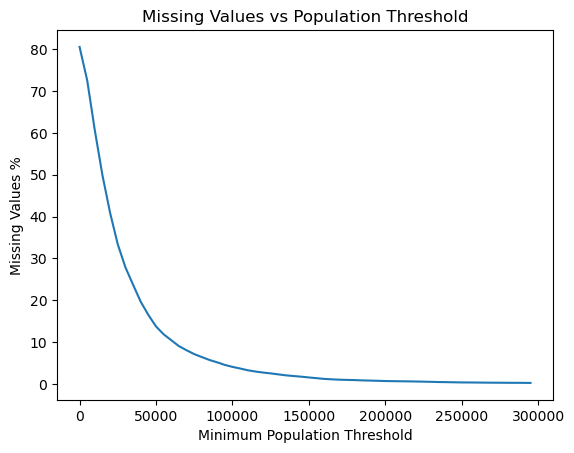

In [98]:
# graph to check missing vs population
threshold = []
missing = []
for i in range(0, 300000, 5000):
    threshold.append(i)
    missing.append(
        (df6[df6["Population_y"] >= i]["Mortality_Rate"].isna().sum()) / len(df6) * 100
    )

# plotting this
plt.plot(threshold, missing)
plt.xlabel("Minimum Population Threshold")
plt.ylabel("Missing Values %")
plt.title("Missing Values vs Population Threshold")

### Setting population Theshold as 50,000 as around this level we will have 10% missing values which is accepatable

In [99]:
def new_death(row):
    if pd.isna(row["Deaths"]):
        return min(int(row["Population_y"] * row["State_Mortality_Rate"]), 9)
    else:
        return row["Deaths"]

In [106]:
population_threshold = 50000
# dropping counties with population less than the threshold
df7 = df6[df6["Population_y"] >= population_threshold]

In [107]:
df7["Deaths_2"] = df7.apply(new_death, axis=1)

In [108]:
df7.sample(5)

,State,State_Code,County,County_Code,Year,Cause,State_Mortality_Rate,Deaths,Population_x,Mortality_Rate,_merge,Population_y,merge2,Deaths_2
5305,Georgia,GA,FAYETTE,13113,2014,Drug poisonings (overdose) Unintentional (X40-...,0.000111,12,109259.0,0.00011,both,109259,both,12
36566,Washington,WA,KING,53033,2007,Drug poisonings (overdose) Unintentional (X40-...,0.000123,212,1847986.0,0.000115,both,1847986,both,212
32824,Texas,TX,MCLENNAN,48309,2003,Drug poisonings (overdose) Unintentional (X40-...,0.000068,<NA>,NaN,<NA>,left_only,218744,both,9
27604,Oregon,OR,LINN,41043,2003,Drug poisonings (overdose) Unintentional (X40-...,0.000066,<NA>,NaN,<NA>,left_only,106035,both,6
37742,Wisconsin,WI,DANE,55025,2013,Drug poisonings (overdose) Unintentional (X40-...,0.000157,78,510026.0,0.000153,both,510026,both,78


In [109]:
df8 = df7[
    [
        "State",
        "State_Code",
        "County",
        "County_Code",
        "Year",
        "Cause",
        "Deaths_2",
        "Population_y",
    ]
]

df8 = df8.rename(columns={"Population_y": "Population", "Deaths_2": "Deaths"})

In [110]:
df9 = (
    df8.groupby(["State", "State_Code", "County", "County_Code", "Year"])
    .agg({"Deaths": "sum", "Population": "mean"})
    .reset_index()
)

In [111]:
df9.sample(5)

,State,State_Code,County,County_Code,Year,Deaths,Population
7508,North Carolina,NC,JOHNSTON,37101,2008,9,161746.0
849,California,CA,MONTEREY,06053,2008,33,406022.0
1502,Delaware,DE,KENT,10001,2015,34,173308.0
3053,Illinois,IL,VERMILION,17183,2009,7,81710.0
3846,Kentucky,KY,LAUREL,21125,2006,10,57239.0


In [112]:
df9["Mortality_Rate"] = df9["Deaths"] / df9["Population"]

In [113]:
# write to parquet
# df9.to_parquet("../../Data/processed/mortality_corrected.parquet", index=False)